In [64]:
#Import all the packages needed for this analysis....

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as sm_o
import seaborn as sb
sb.set_style('whitegrid')
import pylab 
import numpy as np
import scipy.stats as stats 
from sklearn import datasets
from sklearn import cross_validation
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [65]:
#Import the dataset
dataset = pd.read_csv('train.csv')
#Separate the dataset into 2 categories (train 80% and test 20%)
train, test = train_test_split(dataset,test_size=0.2)

In [66]:
#Command to export to excel csv format
#test.to_csv("testdata")

In [67]:
#start doing some EDA for both train and test dataset
train.info()
print ("--------------------------------")
test.info()
#Another way for the startup EDA
#train.count()
#train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 66 to 577
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            573 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          158 non-null object
Embarked       711 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB
--------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 394 to 363
Data columns (total 12 columns):
PassengerId    179 non-null int64
Survived       179 non-null int64
Pclass         179 non-null int64
Name           179 non-null object
Sex            179 non-null object
Age            141 non-null float64
SibSp          179 non-null int64
Parch          179 non-null int6

In [68]:
#We can see the missing value, but here is another way to see the missing (NA) values.
#y = []
#for i in range(len(train.columns)):
#    y.append(pd.isnull(train.iloc[:,i]).mean())
#y

In [69]:
train.head()
#test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29,0,0,C.A. 29395,10.5000,F33,S
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
514,515,0,3,"Coleff, Mr. Satio",male,24,0,0,349209,7.4958,NaN,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
521,522,0,3,"Vovk, Mr. Janko",male,22,0,0,349252,7.8958,NaN,S


In [70]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,573.000000,712.000000,712.000000,712.000000
mean,439.150281,0.375000,2.310393,29.891501,0.504213,0.389045,30.644539
std,259.443017,0.484463,0.837251,14.522022,1.040656,0.834585,44.212381
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,211.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.917700
50%,437.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,662.250000,1.000000,3.000000,39.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
#To find out the survival rate in this incident for the train dataset
float(train.Survived.sum())/712

0.375

In [72]:
# After the inital EDA, I decided that 3 variables, PassengerID, Name, and Ticket, are not useful for our analysis.
#I thought the name may have some correlation as to there may be a common name for better survival,
#but I feel the name itself has a direct causation of survival rate, 
#rather more of gender and age have influence on the surival rate.

#drop unnecessary columns, these columns won't be useful in analysis and prediction
train = train.drop(['PassengerId','Name','Ticket'], axis=1)
test    = test.drop(['PassengerId','Name','Ticket'], axis=1)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: order is deprecated, use sort_values(...)


FirstName
Bertha       1.000000
Elizabeth    1.000000
Alice        0.833333
Helen        0.800000
Anna         0.800000
Name: Survived, dtype: float64

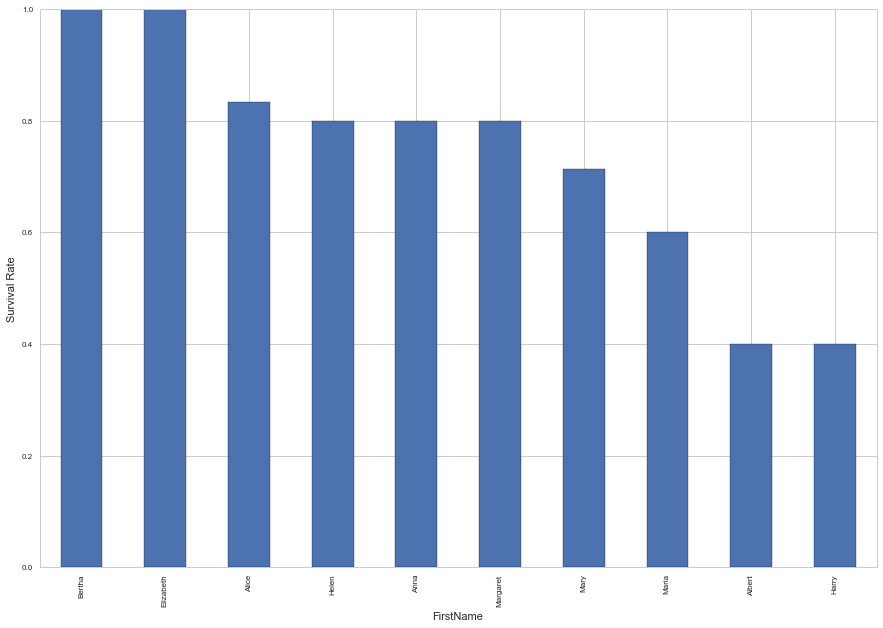

In [101]:
# Just for fun and practice: Name matters?  

Names = pd.read_csv('train.csv')
namedata = Names
namedata['FirstName'] = namedata['Name'].str.extract('(Mr\. |Miss\. |Master. |Mrs\.[A-Za-z ]*\()([A-Za-z]*)')[1]
#Find the list of names, appeared at least 5 times 
popularname = namedata[namedata['FirstName'].isin(namedata['FirstName'].value_counts()[namedata['FirstName'].value_counts() > 4].index)]
popularname.shape
NameSR = (popularname.groupby('FirstName').Survived.sum()/popularname.groupby('FirstName').Survived.count()).order(ascending=False)
NameSRM = NameSR.head(10)
NameSRM.plot(kind='bar',y='Survival rate',fontsize=8,figsize=(15,10)).set_ylabel("Survival Rate");
#Graph1 = NameSR.get_figure()
NameSR.head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


FirstName
Alfred    0.000000
Arthur    0.000000
Joseph    0.000000
James     0.090909
Johan     0.111111
Name: Survived, dtype: float64

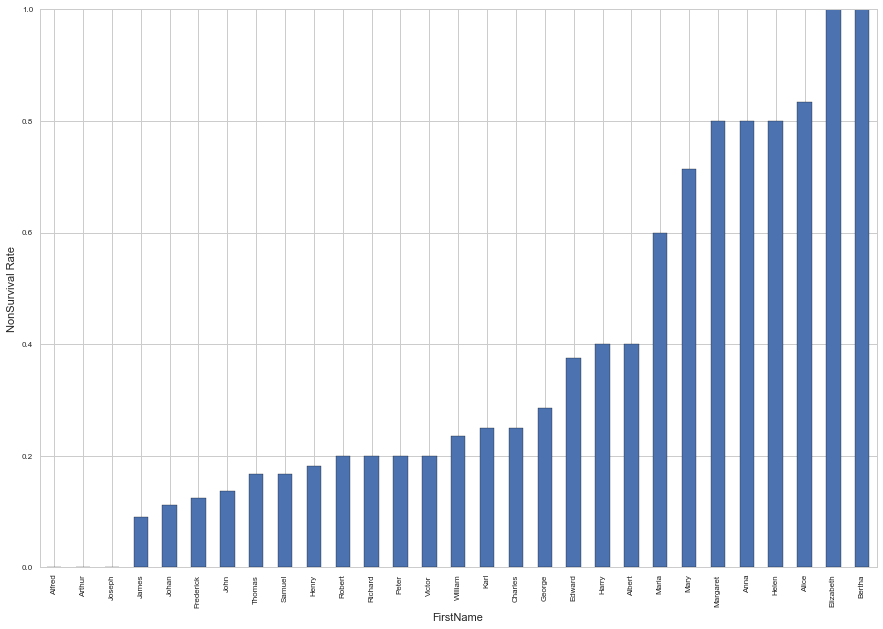

In [102]:
#What's the unlucky names in Titanic incidence.
NameNSR = (popularname.groupby('FirstName').Survived.sum()/popularname.groupby('FirstName').Survived.count()).order()
Graph2 = NameNSR.plot(kind='bar',y='Survival rate',fontsize=8,figsize=(15,10))
Graph2.set_ylabel("NonSurvival Rate")
NameNSR.head()

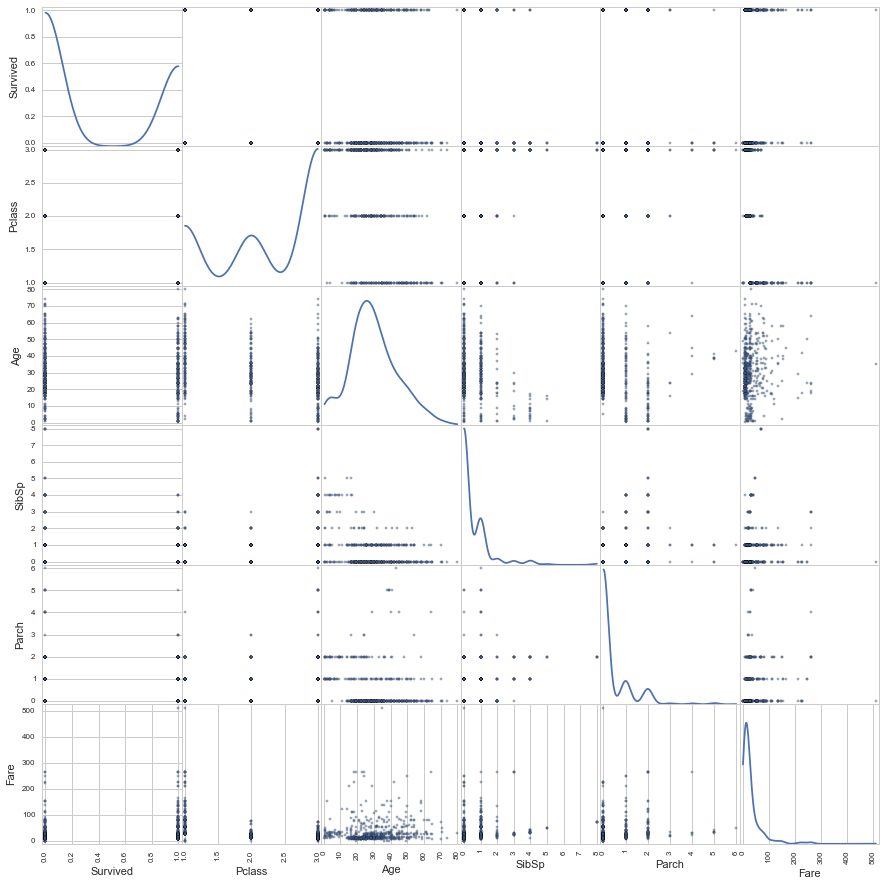

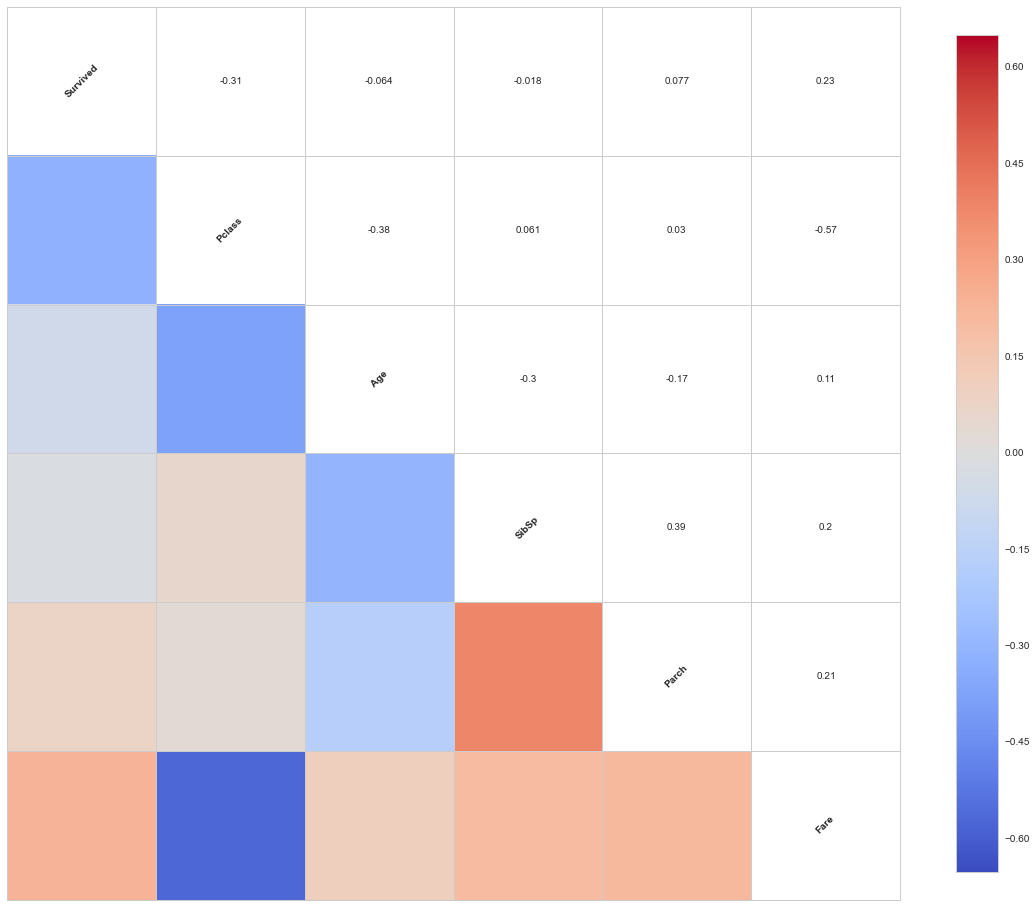

In [73]:
#Some nice looking EDA plots...
pd.scatter_matrix(train,figsize=(15,15),diagonal= 'kde');
plt.figure(figsize=(20,20))
sb.corrplot(train)

In [74]:
#Most realistic correlation matrix
np.round(train.corr(),2)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.31,-0.06,-0.02,0.08,0.23
Pclass,-0.31,1.00,-0.38,0.06,0.03,-0.57
Age,-0.06,-0.38,1.00,-0.30,-0.17,0.11
SibSp,-0.02,0.06,-0.30,1.00,0.39,0.20
Parch,0.08,0.03,-0.17,0.39,1.00,0.21
Fare,0.23,-0.57,0.11,0.20,0.21,1.00


In [75]:
#EDA for Cabin.
types = set(train.Cabin)
#print types
len(types)

# I think the cabin has any direct influence whether the passenger can be survived or not,
# at least not more than the gender, age and classes. 
# I would throw this variable away.
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin",axis=1, inplace= True)

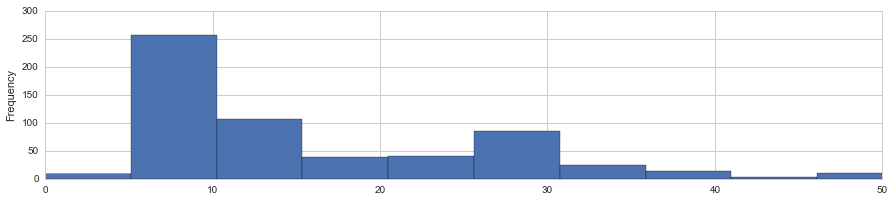

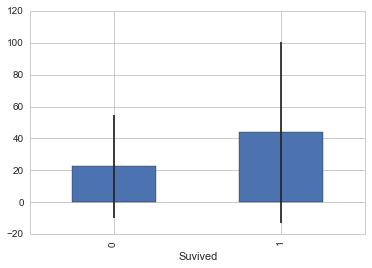

In [76]:
#EDA for Fare

train["Fare"].fillna(train["Fare"].median(),inplace=True)
FareNS = train["Fare"][train["Survived"]== 0]
FareS = train["Fare"][train["Survived"]== 1]

AvgFare = DataFrame([FareNS.mean(),FareS.mean()])
StvFare = DataFrame([FareNS.std(),FareS.std()])

train['Fare'].plot(kind='hist', figsize=(15,3), bins=100, xlim=(0,50))
AvgFare.index.names = StvFare.index.names =  ["Suvived"]
AvgFare.plot(yerr=StvFare, kind='bar', legend=False)

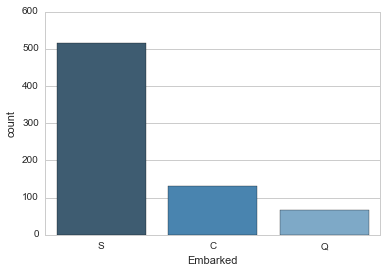

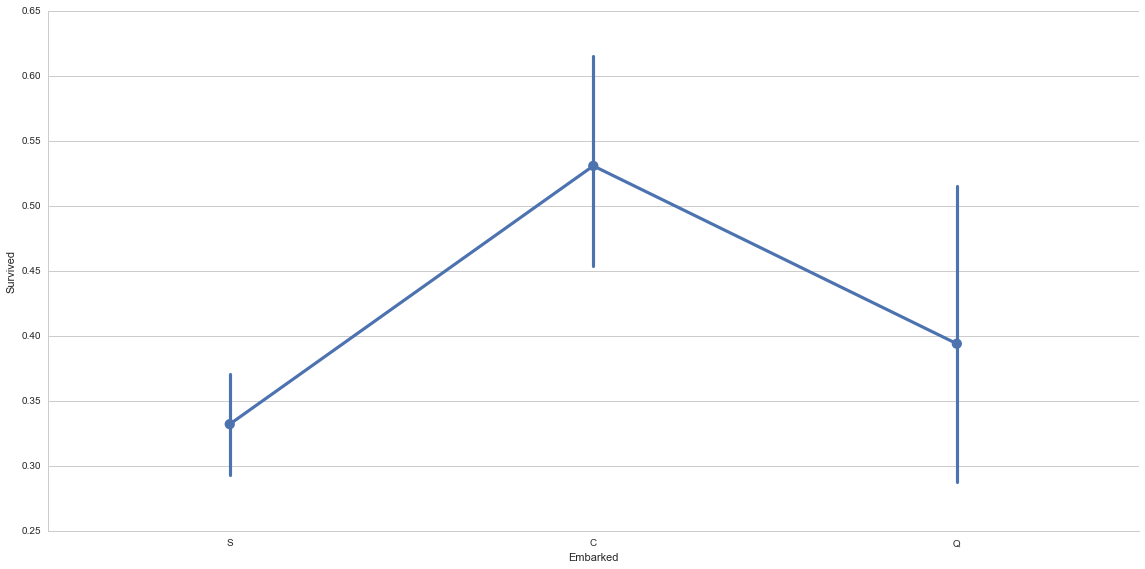

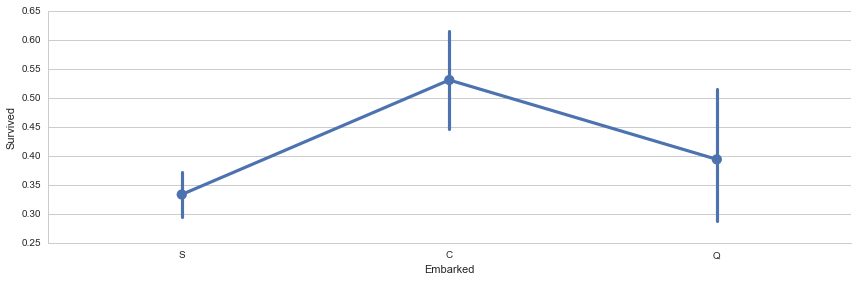

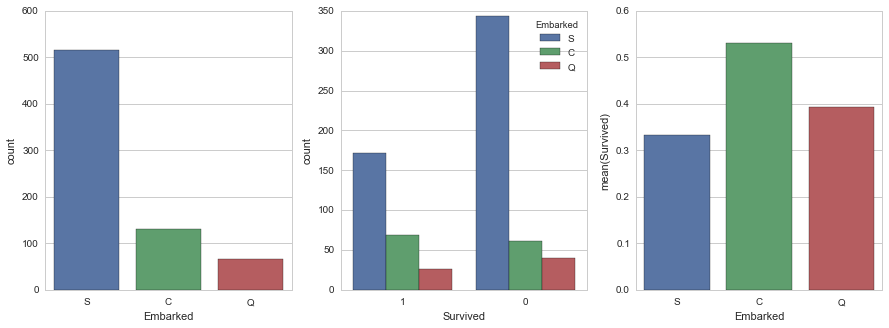

In [77]:
#EDA for Embarked
sb.countplot(x="Embarked",data=train,palette="Blues_d");
sb.factorplot('Embarked','Survived', data=train, order=['S','C','Q'], size=8,aspect=2);
train["Embarked"] = train["Embarked"].fillna("S")
sb.factorplot('Embarked','Survived',data= train, size=4, order= ('S','C','Q'),aspect=3)
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(15,5))

sb.countplot('Embarked', data=train, ax=axis1)
sb.countplot('Survived', hue="Embarked",data=train, order=[1,0],ax=axis2)
Emb_SR = train[["Embarked", "Survived"]].groupby(["Embarked"],as_index=False).mean()
sb.barplot('Embarked', 'Survived', data= Emb_SR, order= ('S','C','Q'), ax=axis3)


In [78]:
#After doing EDA, the Embarked "S" is not really helping the analysis, 
#so I decided to drop the dummy variable of "S".
EmbDum = pd.get_dummies(train['Embarked'])
EmbDum.drop(['S'],axis=1,inplace=True)

EmbDum_Test = pd.get_dummies(test['Embarked'])
EmbDum_Test.drop(['S'],axis=1,inplace=True)

train = train.join(EmbDum)
test = test.join(EmbDum_Test)

train.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)
#train.head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


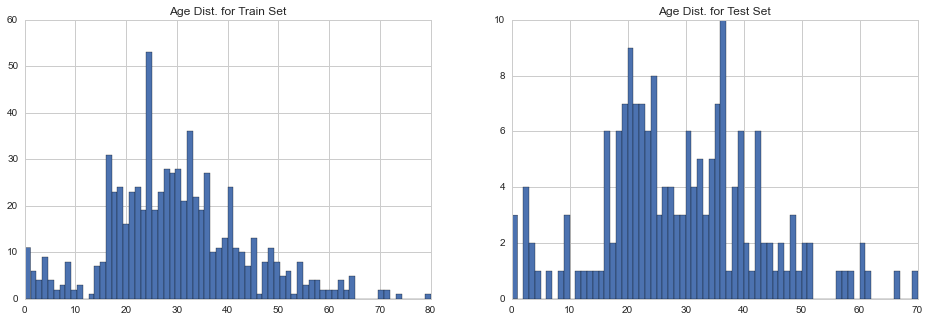

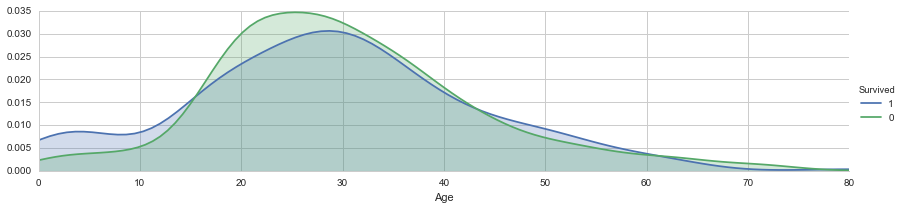

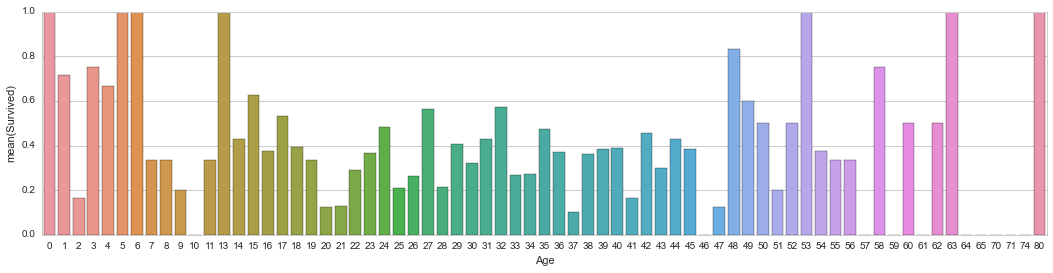

In [105]:
#EDA for Age

fig, (axis1,axis2) = plt.subplots(1,2, figsize=(16,5))
axis1.set_title('Age Dist. for Train Set')
axis2.set_title('Age Dist. for Test Set')

#We have about 140 missing vlaues in age.
#I don't want to disturb the current distribution of the age group,
#so I decided to randomly generate those numbers somewhere from the mean to 1 standard deviation away.
AveAge = train["Age"].mean()
StdAge = train["Age"].std()
NAAge = train["Age"].isnull().sum()

AveAge_test = test["Age"].mean()
StdAge_test = test["Age"].std()
NAAge_test  = test["Age"].isnull().sum()

RanTrain = np.random.randint(AveAge - StdAge, AveAge + StdAge, size=NAAge)
RanTest = np.random.randint(AveAge_test - StdAge_test, AveAge_test + StdAge_test, size=NAAge_test)

train["Age"][np.isnan(train["Age"])] = RanTrain
test["Age"][np.isnan(test["Age"])] = RanTest

train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

train['Age'].hist(bins=70,ax=axis1)
test['Age'].hist(bins=70,ax=axis2)

facet = sb.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sb.kdeplot,'Age', shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend();

fig, axis1 = plt.subplots(1,1,figsize=(18,4));
AveAge = train[['Age', 'Survived']].groupby(['Age'],as_index=False).mean()

sb.barplot(x='Age', y='Survived', data=AveAge);


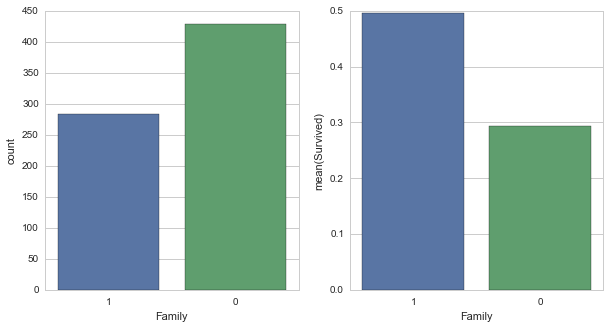

In [80]:
# EDA for sibsp & parch
# I will combine these two variables together to make it whether the individual is on board
# with any family member or single person

train['Family'] = train["Parch"] + train["SibSp"]
train['Family'].loc[train['Family'] >0] = 1
train['Family'].loc[train['Family'] ==0] = 0

test['Family'] = test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] >0] = 1
test['Family'].loc[test['Family'] ==0] = 0

train = train.drop(['SibSp','Parch'], axis=1)
test = test.drop(['SibSp','Parch'], axis=1)

fig, (axis1, axis2) = plt.subplots(1,2,sharex=True, figsize=(10,5))

sb.countplot(x='Family', data= train, order=[1,0],ax= axis1)
FamPer = train[["Family", "Survived"]].groupby(['Family'], as_index= False).mean()
sb.barplot(x='Family', y= 'Survived', data= FamPer, order= [1,0], ax=axis2)
                                                
axis1.set_xticklabels(["Family","Single"], rotation=0)

[<matplotlib.text.Text at 0x1108c3f90>, <matplotlib.text.Text at 0x10c40c890>]

In [82]:
# Sex (Male or Female) Variable
# With my EDA and knowledge, it would be a good idea to combine the concepts that
# female and children are saved with more priority than male. 
# Therefore I decided to create 3 categories, Male, Female, and Children

def EvaPer(passenger):
    age, sex= passenger
    return 'child' if age < 16 else sex

train['Person'] = train[['Age','Sex']].apply(EvaPer, axis=1)
test['Person'] = test[['Age','Sex']].apply(EvaPer, axis=1)

train.drop(['Sex'], axis=1, inplace=True)
test.drop(['Sex'], axis=1, inplace= True )

PersonDummy = pd.get_dummies(train['Person'])
PersonDummy.columns = ['Male', 'Female', 'Child']
PersonDummy.drop(['Male'],axis= 1, inplace= True)

PersonDummy_Test = pd.get_dummies(test['Person'])
PersonDummy_Test.columns = ['Male', 'Female', 'Child']
PersonDummy_Test.drop(['Male'],axis= 1, inplace= True)

train = train.join(PersonDummy)
test = test.join(PersonDummy_Test)

fig, (axis1, axis2) = plt.subplots(1,2, figsize= (10,5))

sb.countplot(x='Person', data=train, ax=axis1)

sb.countplot(x='Person', data=train, ax=axis1)


PersonSR = train[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sb.barplot(x='Person', y='Survived', data=PersonSR, ax=axis2, order = ['male','female','child'])

train.drop(['Person'], axis=1, inplace=True)
test.drop(['Person'], axis=1, inplace = True)

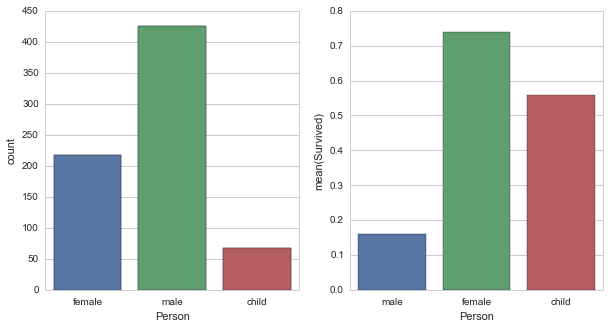

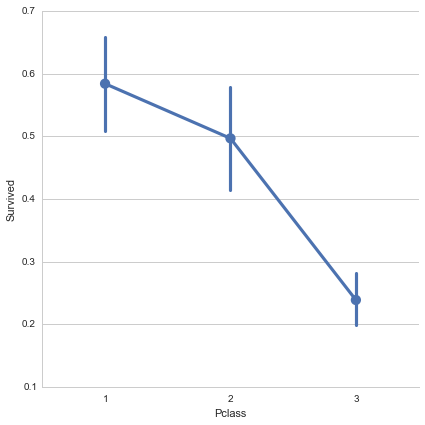

In [84]:
# EDA for Pclass

sb.factorplot('Pclass', 'Survived', order=[1,2,3], data=train, size=6);

PclassDummy = pd.get_dummies(train['Pclass'])
PclassDummy.columns = ['1st', '2nd', '3rd']
PclassDummy.drop(['2nd', '3rd'], axis=1, inplace=True) 

PclassDummy_test = pd.get_dummies(test['Pclass'])
PclassDummy_test.columns = ['1st', '2nd', '3rd']
PclassDummy_test.drop(['2nd', '3rd'], axis=1, inplace= True)

train.drop(['Pclass'],axis=1, inplace= True)
test.drop(['Pclass'],axis=1, inplace= True)
    
train = train.join(PclassDummy)
test = test.join(PclassDummy_test)

In [86]:
#Now, the EDA is done, and I devide the dataset to run some models to see how they perform.
XforTrain = train.drop("Survived", axis=1)
YforTrain = train["Survived"]
XforTest = test.drop(["Survived"],axis=1).copy()
YforTest = test["Survived"]

In [87]:
#XforTrain.head()

,Age,Fare,C,Q,Family,Female,Child,1st
66,29,10.5000,0,0,0,1,0,0
709,39,15.2458,1,0,1,0,1,0
514,24,7.4958,0,0,0,0,1,0
648,30,7.5500,0,0,0,0,1,0
521,22,7.8958,0,0,0,0,1,0


In [88]:
#XforTest.head()

,Age,Fare,C,Q,Family,Female,Child,1st
394,24,16.7000,0,0,1,1,0,0
649,23,7.5500,0,0,0,1,0,0
675,18,7.7750,0,0,0,0,1,0
718,35,15.5000,0,1,0,0,1,0
43,3,41.5792,1,0,1,0,0,0


In [89]:
#Logistic Regression
LogReg = LogisticRegression()
LogReg.fit(XforTrain,YforTrain)
PredLogReg = LogReg.predict(XforTest)
LogReg.score(XforTrain, YforTrain)


0.78230337078651691

In [106]:
#Actual performance on the test dataset
LogReg.score(XforTest,YforTest)
#It turns out to be very close to the training dataset.

0.7988826815642458

In [90]:
#Logistic Regression with cross validation
#LogRegT = LogisticRegression(random_state=1)
#scoresLR = cross_validation.cross_val_score(
#    LogReg,
#    XforTrain,
#    YforTrain,
#    cv=3
#)

print(scoresLR.mean())
#LogReg.fit(XforTrain,YforTrain)
#PredLogReg = LogReg.predict(XforTest)
#LogReg.score(XforTrain, YforTrain)


0.775301681854


In [91]:
#create_submission(LogReg,XforTrain,XforTest,predictors,'testing')

In [92]:
#np.savetxt('PredLogReg',PredLogReg)

In [93]:
# Support Vector Machines
svc = SVC()
svc.fit(XforTrain,YforTrain)
PredSVC = svc.predict(XforTrain)
svc.score(XforTrain, YforTrain)

0.8778089887640449

In [94]:
#Actual performance on the test dataset
svc.score(XforTest,YforTest)

0.70949720670391059

In [95]:
# K-Nearest Neighbors 

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(XforTrain, YforTrain)
PredKNN = knn.predict(XforTest)
knn.score(XforTrain, YforTrain)


0.8370786516853933

In [96]:
#Actual performance on the test dataset
knn.score(XforTest,YforTest)

0.7039106145251397

In [97]:
#Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(XforTrain, YforTrain)
PredGNB = gaussian.predict(XforTest)
gaussian.score(XforTrain, YforTrain)


0.7696629213483146

In [98]:
#Actual performance on the test dataset
gaussian.score(XforTest,YforTest)

0.78770949720670391

In [99]:
#Randome Forests

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(XforTrain, YforTrain)
PredRF = random_forest.predict(XforTest)
random_forest.score(XforTrain,YforTrain)


0.9915730337078652

In [100]:
#Actual performance on the test dataset
random_forest.score(XforTest,YforTest)

0.77653631284916202